In [41]:
from Scripts import ScriptOptions 
import os

params= ScriptOptions(
    ImageFolder= r"./TestTagPic/",
    model='big', #Ещё есть convnext, swinv2, big, vit
    gen_threshold=0.35, #увереность для общей картинки/и если не установлено значение в конфиге yolo моделей то для них тоже
    char_threshold=0.75, # Увереность для персонажей, теги персонажей берутся только из полной области, по причине я так захотел
    batch=2,
    recursive=False,
    save_txt=True,
    append_txt=False,
    add_tags_before="test1",
    add_tags_after="test2",
    remove_tags=""
    
)



In [43]:
from Scripts import BatchTagging
result = BatchTagging(params)

Файл config.json уже существует в models\taggers\wd-eva02-large-tagger-v3
Файл selected_tags.csv уже существует в models\taggers\wd-eva02-large-tagger-v3
Загрузка модели тегирования 'big' из 'SmilingWolf/wd-eva02-large-tagger-v3'...
Loading model from models\taggers\wd-eva02-large-tagger-v3\model.safetensors using safetensors
Загрузка списка тегов...
Загрузка тегов из локального файла: models\taggers\wd-eva02-large-tagger-v3\selected_tags.csv
Создание трансформации данных...
Загрузка конфигурации детекторов из detectors.json...
Загрузка модели YOLO person_yolov8s-seg.pt...
Loading YOLO model from local directory: models\yolo\person_yolov8s-seg.pt
Загрузка модели YOLO face_yolov9c.pt...
Loading YOLO model from local directory: models\yolo\face_yolov9c.pt
Всего изображений для обработки: 4

Обработка изображения 1/4: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing4.jpg

image 1/1 C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing4.jpg: 512x640 (no detections), 18

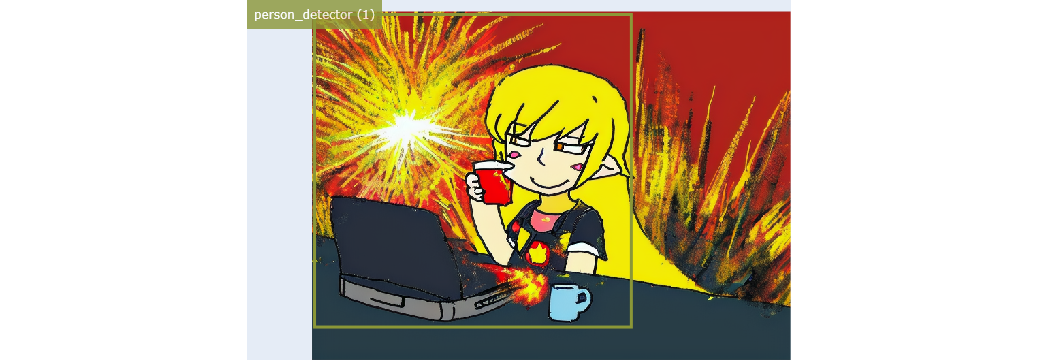

Информация о изображении #2: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing1.png

Объединенные теги:
test1, 1girl, blonde hair, blush stickers, computer, cup, explosion, fire, laptop, long hair, mug, pointy ears, smile, solo, t-shirt, yellow eyes, test2

Теги без включения yolo моделей:
1girl, blonde hair, solo, computer, laptop, long hair, blush stickers, cup, pointy ears, explosion, smile, yellow eyes, mug, t-shirt, fire

Разница тегов (присутствуют в объединенных, но отсутствуют в тегах без yolo):
test1, test2


In [44]:
from Scripts import view_image_results
view_image_results(result, 1, visualize=True, save_visualization=False, verbose=True)

In [30]:
full_pic_results, merged_tags= result

In [32]:
from Scripts.configs import ScriptOptions
from Scripts.main import BatchTagging
from Scripts.tag_manager import TagManager
from Scripts.preprocess import NumpyEncoder
from pathlib import Path
import json


tag_manager = TagManager()
tag_manager.build_index_from_results(merged_results)

# Показываем топ-10 тегов
top_tags = tag_manager.get_top_tags(10)
print("\nТоп-10 самых частых тегов:")
for tag, count in top_tags:
    print(f"{tag}: {count} изображений")

# Находим все изображения с тегом "person"
person_images = tag_manager.find_images_with_tag("person")
print(f"\nНайдено {len(person_images)} изображений с тегом 'person'")

# Заменяем тег во всех изображениях
modified_results, count = tag_manager.replace_tag("girl", "female", merged_results)
print(f"Заменен тег 'girl' на 'female' в {count} изображениях")

# Сортируем теги по важности
#important_tags = ["high quality", "best quality", "masterpiece", "person", "face"]
#sorted_results = tag_manager.sort_tags(modified_results, alphabetical=False, importance=important_tags)

# Фильтруем результаты по тегу
filtered_results = TagManager.filter_results_by_tag(sorted_results, "face", include=True)
print(f"Отфильтровано {len(filtered_results)} изображений с тегом 'face'")

# Сохраняем изменения в TXT файлы
tag_manager.save_changes_to_txt(sorted_results)

# Сохраняем обновленные результаты в JSON
with open("updated_results.json", "w", encoding="utf-8") as f:
    json.dump(sorted_results, f, indent=2, ensure_ascii=False, cls=NumpyEncoder)

print("Обработка завершена. Обновленные результаты сохранены в 'updated_results.json'")




Топ-10 самых частых тегов:
1girl: 4 изображений
blonde hair: 4 изображений
solo: 4 изображений
test1: 4 изображений
test2: 4 изображений
yellow eyes: 4 изображений
long hair: 3 изображений
looking at viewer: 3 изображений
dress: 2 изображений
very long hair: 2 изображений

Найдено 0 изображений с тегом 'person'
Заменен тег 'girl' на 'female' в 4 изображениях
Отфильтровано 0 изображений с тегом 'face'
Обновлены теги в: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing4.txt
Обновлены теги в: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing1.txt
Обновлены теги в: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing2.txt
Обновлены теги в: C:\Users\liali\YoloWdTagger\wdv3-timm\TestTagPic\tag_managing3.txt
Обработка завершена. Обновленные результаты сохранены в 'updated_results.json'
